In [157]:
import urllib2 # module to read in HTML
import bs4 # BeautifulSoup: module to parse HTML and XML
import json # 
import datetime as dt # module for manipulating dates and times
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
import StringIO

# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

## Recall from from lab last week 09/19/2014

Previously discussed: 

* More pandas, matplotlib for exploratory data analysis
* Brief introduction to numpy and scipy
* Working on the command line
* Overview of git and Github

## Today, we will discuss the following:

* urllib2 - reads in HTML
* BeautifulSoup - use to parse HTML and XML code
    * Reddit
* JSON examples
    * World Cup

<a href=https://raw.githubusercontent.com/cs109/2014/master/labs/Lab4_Notes.ipynb download=Lab4_Notes.ipynb> Download this notebook from Github </a>

# urllib2

[urllib2](https://docs.python.org/2/library/urllib2.html) is a useful module to get information about and retrieving data from the web. The function `urlopen()` opens a URL (similar to opening a file). The file-like object has some of the methods as a file object. For example, to read the entire HTML of the webpage into a single string, use the method `read()`. `readlines()` can read in the text line by line. While `read()` reads in the HTML code and and `close()` closes the URL connection. 


In [2]:
x = urllib2.urlopen("http://www.google.com")
htmlSource = x.read()
x.close()

In [3]:
type(htmlSource)

str

In [4]:
print htmlSource

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-GB"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script>(function(){window.google={kEI:'vyJIV5fpKuSTgAaaw5-ICw',kEXPI:'1350654,1350960,3700258,3700388,3700389,4029815,4031109,4032678,4036509,4036527,4038012,4039268,4040135,4043492,4045841,4048347,4052304,4054551,4056038,4057739,4058337,4059767,4060015,4061155,4061181,4061552,4061924,4062333,4062662,4062987,4063112,4063126,4063131,4063879,4063960,4064131,4064449,4064495,4064501,4064702,4064815,4064904,4064930,4065406,4065786,4065794,4065855,4065919,4066101,4066654,4066671,4066686,4066776,4066963,4067274,4067518,4067629,4067678,4067702,4067860,4067938,4068022,4068042,4068067,4068186,4068256,4068452,4068777,8300096,8300272,8300366,8503209,8503585,8504350,8504456,8504874,8504892,8504930,10200083',authuser:0,kscs:'c9c918

# BeautifulSoup

Once you have the HTML source code, you have to parse it and clean it up.

[BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a really useful python module for parsing HTML and XML files.  Let's try a few examples. 

For this section, we will be working with the HTML code from [Reddit](http://www.reddit.com). 

In [10]:
# This doesnt quite work as reddit blocks bots (sic!)
r = requests.get(r'http://www.reddit.com/user/spilcm/comments/.json').content

print r

# x = urllib2.urlopen("http://www.reddit.com") # Opens URLS
# htmlSource = x.read()
# x.close()
# print htmlSource

{"kind": "Listing", "data": {"modhash": "", "children": [{"kind": "t1", "data": {"subreddit_id": "t5_2t1b7", "link_title": "howcarworks.com - learn all about how cars work", "banned_by": null, "removal_reason": null, "link_id": "t3_3wjyyc", "link_author": "cosmicservant", "likes": null, "replies": "", "user_reports": [], "saved": false, "id": "cxz0xn4", "gilded": 0, "archived": false, "stickied": false, "author": "spilcm", "parent_id": "t3_3wjyyc", "score": 1, "approved_by": null, "over_18": false, "report_reasons": null, "controversiality": 0, "body": "This great for a novice like me :)", "edited": false, "author_flair_css_class": null, "downs": 0, "body_html": "&lt;div class=\"md\"&gt;&lt;p&gt;This great for a novice like me :)&lt;/p&gt;\n&lt;/div&gt;", "quarantine": false, "subreddit": "UsefulWebsites", "score_hidden": false, "name": "t1_cxz0xn4", "created": 1450153738.0, "author_flair_text": null, "link_url": "http://www.howacarworks.com", "created_utc": 1450124938.0, "ups": 1, "mo

In [12]:
soup = bs4.BeautifulSoup(r, 'lxml')
print soup.prettify()

<html>
 <body>
  <p>
   {"kind": "Listing", "data": {"modhash": "", "children": [{"kind": "t1", "data": {"subreddit_id": "t5_2t1b7", "link_title": "howcarworks.com - learn all about how cars work", "banned_by": null, "removal_reason": null, "link_id": "t3_3wjyyc", "link_author": "cosmicservant", "likes": null, "replies": "", "user_reports": [], "saved": false, "id": "cxz0xn4", "gilded": 0, "archived": false, "stickied": false, "author": "spilcm", "parent_id": "t3_3wjyyc", "score": 1, "approved_by": null, "over_18": false, "report_reasons": null, "controversiality": 0, "body": "This great for a novice like me :)", "edited": false, "author_flair_css_class": null, "downs": 0, "body_html": "&lt;div class=\"md\"&gt;&lt;p&gt;This great for a novice like me :)&lt;/p&gt;\n&lt;/div&gt;", "quarantine": false, "subreddit": "UsefulWebsites", "score_hidden": false, "name": "t1_cxz0xn4", "created": 1450153738.0, "author_flair_text": null, "link_url": "http://www.howacarworks.com", "created_utc": 145

### Navigating the tree using tags

The simplest way to navigate the parse tree is to say the name of the tag you want. If you want the `<head>` tag, just say `soup.head`:

In [19]:
print soup.body.prettify()

<body>
 <p>
  {"kind": "Listing", "data": {"modhash": "", "children": [{"kind": "t1", "data": {"subreddit_id": "t5_2t1b7", "link_title": "howcarworks.com - learn all about how cars work", "banned_by": null, "removal_reason": null, "link_id": "t3_3wjyyc", "link_author": "cosmicservant", "likes": null, "replies": "", "user_reports": [], "saved": false, "id": "cxz0xn4", "gilded": 0, "archived": false, "stickied": false, "author": "spilcm", "parent_id": "t3_3wjyyc", "score": 1, "approved_by": null, "over_18": false, "report_reasons": null, "controversiality": 0, "body": "This great for a novice like me :)", "edited": false, "author_flair_css_class": null, "downs": 0, "body_html": "&lt;div class=\"md\"&gt;&lt;p&gt;This great for a novice like me :)&lt;/p&gt;\n&lt;/div&gt;", "quarantine": false, "subreddit": "UsefulWebsites", "score_hidden": false, "name": "t1_cxz0xn4", "created": 1450153738.0, "author_flair_text": null, "link_url": "http://www.howacarworks.com", "created_utc": 1450124938.0,

### .contents and .children

A tag’s children are available in a list called `.contents` which returns a list.  

In [20]:
soup.body.contents

[<p>{"kind": "Listing", "data": {"modhash": "", "children": [{"kind": "t1", "data": {"subreddit_id": "t5_2t1b7", "link_title": "howcarworks.com - learn all about how cars work", "banned_by": null, "removal_reason": null, "link_id": "t3_3wjyyc", "link_author": "cosmicservant", "likes": null, "replies": "", "user_reports": [], "saved": false, "id": "cxz0xn4", "gilded": 0, "archived": false, "stickied": false, "author": "spilcm", "parent_id": "t3_3wjyyc", "score": 1, "approved_by": null, "over_18": false, "report_reasons": null, "controversiality": 0, "body": "This great for a novice like me :)", "edited": false, "author_flair_css_class": null, "downs": 0, "body_html": "&lt;div class=\\"md\\"&gt;&lt;p&gt;This great for a novice like me :)&lt;/p&gt;\\n&lt;/div&gt;", "quarantine": false, "subreddit": "UsefulWebsites", "score_hidden": false, "name": "t1_cxz0xn4", "created": 1450153738.0, "author_flair_text": null, "link_url": "http://www.howacarworks.com", "created_utc": 1450124938.0, "ups":

In [21]:
len(soup.body.contents)

1

In [22]:
# Extract first three elements from the list of contents
soup.body.contents[0:3]

[<p>{"kind": "Listing", "data": {"modhash": "", "children": [{"kind": "t1", "data": {"subreddit_id": "t5_2t1b7", "link_title": "howcarworks.com - learn all about how cars work", "banned_by": null, "removal_reason": null, "link_id": "t3_3wjyyc", "link_author": "cosmicservant", "likes": null, "replies": "", "user_reports": [], "saved": false, "id": "cxz0xn4", "gilded": 0, "archived": false, "stickied": false, "author": "spilcm", "parent_id": "t3_3wjyyc", "score": 1, "approved_by": null, "over_18": false, "report_reasons": null, "controversiality": 0, "body": "This great for a novice like me :)", "edited": false, "author_flair_css_class": null, "downs": 0, "body_html": "&lt;div class=\\"md\\"&gt;&lt;p&gt;This great for a novice like me :)&lt;/p&gt;\\n&lt;/div&gt;", "quarantine": false, "subreddit": "UsefulWebsites", "score_hidden": false, "name": "t1_cxz0xn4", "created": 1450153738.0, "author_flair_text": null, "link_url": "http://www.howacarworks.com", "created_utc": 1450124938.0, "ups":

Instead of getting them as a list, you can iterate over a tag’s children using the .children generator:

In [23]:
soup.body.children

In [24]:
for child in soup.body.children:
    print(child)

<p>{"kind": "Listing", "data": {"modhash": "", "children": [{"kind": "t1", "data": {"subreddit_id": "t5_2t1b7", "link_title": "howcarworks.com - learn all about how cars work", "banned_by": null, "removal_reason": null, "link_id": "t3_3wjyyc", "link_author": "cosmicservant", "likes": null, "replies": "", "user_reports": [], "saved": false, "id": "cxz0xn4", "gilded": 0, "archived": false, "stickied": false, "author": "spilcm", "parent_id": "t3_3wjyyc", "score": 1, "approved_by": null, "over_18": false, "report_reasons": null, "controversiality": 0, "body": "This great for a novice like me :)", "edited": false, "author_flair_css_class": null, "downs": 0, "body_html": "&lt;div class=\"md\"&gt;&lt;p&gt;This great for a novice like me :)&lt;/p&gt;\n&lt;/div&gt;", "quarantine": false, "subreddit": "UsefulWebsites", "score_hidden": false, "name": "t1_cxz0xn4", "created": 1450153738.0, "author_flair_text": null, "link_url": "http://www.howacarworks.com", "created_utc": 1450124938.0, "ups": 1, 

In [26]:
# print the title of reddit
soup.body.title

In [ ]:
# print the string in the title
soup.head.title.string

### .descendants

Attribute lets you iterate over all of a tag’s children, recursively: its direct children, the children of its direct children, and so on:

In [ ]:
for child in soup.head.descendants:
    print child

### .strings

If there’s more than one thing inside a tag, you can still look at just the strings. Use the .strings generator

In [ ]:
for string in soup.strings:
    print(repr(string))

### .stripped_strings

These strings tend to have a lot of extra whitespace, which you can remove by using the .stripped_strings generator instead

In [ ]:
for string in soup.stripped_strings:
    print(repr(string))

### .parent

You can access an element’s parent with the `.parent` attribute. In the example “three sisters” document, the `<head>` tag is the parent of the `<title>` tag:

In [ ]:
soup.title

In [ ]:
soup.title.string

In [ ]:
soup.title.string.parent

# Searching the Tree

Now, let's consider examples of different filters you can use to search this nested tree of HTML. These filters show up again and again, throughout the search API. You can use them to filter based on a tag’s name, on its attributes, on the text of a string, or on some combination of these.

#### Use `find_all()` to find all tags

One common task is extracting all the URLs found within a page's tags:

In [27]:
# search for all <a> tags; returns a list
soup.find_all('a')

[]

In [ ]:
# your turn
# search for all the paragragh tags

In [ ]:
# your turn
# search for all the table tags

Other arguments to the `.find_all()` function include `limit` and `text`. What do those do? 

In [ ]:
# your turn 
# search for all the <a> tags and use the limit argument 

In [ ]:
# your turn 
# What does the using the text argument do? 

#### Use `.get()` to extract an attribute

In [ ]:
soup.find_all('a')[1].get('href')

#### Looping through tags

In [ ]:
# your turn
# write a for loop printing all the links from reddit

In [ ]:
# your turn
# write a for loop, but use a list comprehension this time
# show the first 5 elements

In [ ]:
# your turn
# split the first url by "/"

Another common task is extracting all the text from a page:

In [ ]:
print(soup.get_text())

# JSON

#### Working with Web APIs
Web APIs are a more convenient way for programs to interact with websites. Many webistes now have a nice API that gives access to it's data in JSON format.


In [28]:
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

In [29]:
a # a dictionary

{'a': 1, 'b': 2}

In [30]:
s # s is a string containing a in JSON encoding

'{"a": 1, "b": 2}'

In [31]:
a2 # reading back the keys are now in unicode

{u'a': 1, u'b': 2}

## World Cup in JSON!

The [2014 FIFA World Cup](http://en.wikipedia.org/wiki/2014_FIFA_World_Cup) was held this summer in Brazil at several different venues.  There was an [API created for the World Cup](http://worldcup.sfg.io) that scraped current match results and output match data as JSON. Possible output includes events such as goals, substitutions, and cards. The [actual matches are listed here](http://worldcup.sfg.io/matches) in JSON. 

* Example from [Fernando Masanori](https://gist.github.com/fmasanori/1288160dad16cc473a53)

In [32]:
url = "http://worldcup.sfg.io/matches"
data = urllib2.urlopen(url).read()
wc = json.loads(data.decode('utf-8'))

In [33]:
"Number of matches in 2014 World Cup: %i" % len(wc)

'Number of matches in 2014 World Cup: 52'

In [35]:
# Print keys in first match
gameIndex = 0
wc[gameIndex].keys()

[u'status',
 u'match_number',
 u'home_team',
 u'away_team',
 u'winner_code',
 u'winner',
 u'away_team_events',
 u'datetime',
 u'location',
 u'home_team_events']

In [41]:
wc[gameIndex]['home_team']

{u'code': u'CAN', u'country': u'Canada', u'goals': 1}

In [37]:
wc[gameIndex]['match_number']

1

In [38]:
wc[gameIndex]['away_team']

{u'code': u'CHN', u'country': u'China', u'goals': 0}

In [39]:
wc[gameIndex]['away_team_events']

[{u'id': 11,
  u'player': u'Wang L S',
  u'time': u'42',
  u'type_of_event': u'substitution-out'},
 {u'id': 13,
  u'player': u'Han P',
  u'time': u'42',
  u'type_of_event': u'substitution-in'},
 {u'id': 9,
  u'player': u'Li Y',
  u'time': u'62',
  u'type_of_event': u'substitution-out'},
 {u'id': 14,
  u'player': u'Zhang R',
  u'time': u'62',
  u'type_of_event': u'substitution-in'},
 {u'id': 10,
  u'player': u'Gu Ys',
  u'time': u'87',
  u'type_of_event': u'substitution-out'},
 {u'id': 12,
  u'player': u'Ma J',
  u'time': u'87',
  u'type_of_event': u'substitution-in'}]

In [42]:
wc[gameIndex]['home_team']

{u'code': u'BRA', u'country': u'Brazil', u'goals': 1}

The [Brazil v Germany (2014 FIFA World Cup)](http://en.wikipedia.org/wiki/Brazil_v_Germany_(2014_FIFA_World_Cup) match on July 8, 2014 where Germany score the most goals in World Cup tournament history.  Germany led 5–0 at half time, with 4 goals scored in a span of 6 minutes, and subsequently brought the score up to 7–0 in the second half. Brazil scored a goal at the last minute, ending the match 7–1. 

Print the team names and goals scored for each match

In [42]:
for elem in wc:
    print elem['home_team']['country'], elem['home_team']['goals'], elem['away_team']['country'], elem['away_team']['goals']

Canada 1 China 0
New Zealand 0 Netherlands 1
Germany 10 Ivory Coast 0
Norway 4 Thailand 0
Japan 1 Switzerland 0
Cameroon 6 Ecuador 0
United States 3 Australia 1
Sweden 3 Nigeria 3
Brazil 2 Korea Republic 0
Spain 1 Costa Rica 1
France 1 England 0
Colombia 1 Mexico 1
Canada 0 New Zealand 0
China 1 Netherlands 0
Germany 1 Norway 1
Ivory Coast 2 Thailand 3
Japan 2 Cameroon 1
Switzerland 10 Ecuador 1
United States 0 Sweden 0
Australia 2 Nigeria 0
Brazil 1 Spain 0
Korea Republic 2 Costa Rica 2
France 0 Colombia 2
England 2 Mexico 1
Netherlands 1 Canada 1
China 2 New Zealand 2
Thailand 0 Germany 4
Ivory Coast 1 Norway 3
Ecuador 0 Japan 1
Switzerland 1 Cameroon 2
Nigeria 0 United States 1
Australia 1 Sweden 1
Costa Rica 0 Brazil 1
Korea Republic 2 Spain 1
Mexico 0 France 5
England 2 Colombia 1
China 1 Cameroon 0
United States 2 Colombia 0
Germany 4 Sweden 1
France 3 Korea Republic 0
Brazil 0 Australia 1
Japan 2 Netherlands 1
Norway 1 England 2
Canada 1 Switzerland 0
China 0 United States 1
Ger

### Create a pandas DataFrame from JSON

In [121]:
data = pd.DataFrame(wc, columns = ['match_number', 'location', 'datetime', 'home_team', 'away_team', 'winner', 'home_team_events', 'away_team_events'])
data.head()

,match_number,location,datetime,home_team,away_team,winner,home_team_events,away_team_events
0,1,Commonwealth Stadium,2015-06-06T15:00:00.000-05:00,"{u'country': u'Canada', u'code': u'CAN', u'goa...","{u'country': u'China', u'code': u'CHN', u'goal...",Canada,"[{u'type_of_event': u'yellow-card', u'player':...","[{u'type_of_event': u'substitution-out', u'pla..."
1,2,Commonwealth Stadium,2015-06-06T18:00:00.000-05:00,"{u'country': u'New Zealand', u'code': u'NZL', ...","{u'country': u'Netherlands', u'code': u'NED', ...",Netherlands,"[{u'type_of_event': u'substitution-out', u'pla...","[{u'type_of_event': u'yellow-card', u'player':..."
2,3,Lansdowne Stadium,2015-06-07T15:00:00.000-05:00,"{u'country': u'Germany', u'code': u'GER', u'go...","{u'country': u'Ivory Coast', u'code': u'CIV', ...",Germany,"[{u'type_of_event': u'goal', u'player': u'Sasi...","[{u'type_of_event': u'yellow-card', u'player':..."
3,4,Lansdowne Stadium,2015-06-07T12:00:00.000-05:00,"{u'country': u'Norway', u'code': u'NOR', u'goa...","{u'country': u'Thailand', u'code': u'THA', u'g...",Norway,"[{u'type_of_event': u'goal', u'player': u'Rønn...","[{u'type_of_event': u'yellow-card', u'player':..."
4,5,BC Place Stadium,2015-06-08T18:00:00.000-05:00,"{u'country': u'Japan', u'code': u'JPN', u'goal...","{u'country': u'Switzerland', u'code': u'SUI', ...",Japan,"[{u'type_of_event': u'goal-penalty', u'player'...","[{u'type_of_event': u'yellow-card', u'player':..."


#### Convert format of a column

Here we pandas [DatetimeIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) to convert the `datetime` column to two seperate columns: a date and a time for each match.

In [122]:
data['game_date'] = pd.DatetimeIndex(data.datetime).date
data['game_time'] = pd.DatetimeIndex(data.datetime).time
data.head()

,match_number,location,datetime,home_team,away_team,winner,home_team_events,away_team_events,game_date,game_time
0,1,Commonwealth Stadium,2015-06-06T15:00:00.000-05:00,"{u'country': u'Canada', u'code': u'CAN', u'goa...","{u'country': u'China', u'code': u'CHN', u'goal...",Canada,"[{u'type_of_event': u'yellow-card', u'player':...","[{u'type_of_event': u'substitution-out', u'pla...",2015-06-06,20:00:00
1,2,Commonwealth Stadium,2015-06-06T18:00:00.000-05:00,"{u'country': u'New Zealand', u'code': u'NZL', ...","{u'country': u'Netherlands', u'code': u'NED', ...",Netherlands,"[{u'type_of_event': u'substitution-out', u'pla...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-06,23:00:00
2,3,Lansdowne Stadium,2015-06-07T15:00:00.000-05:00,"{u'country': u'Germany', u'code': u'GER', u'go...","{u'country': u'Ivory Coast', u'code': u'CIV', ...",Germany,"[{u'type_of_event': u'goal', u'player': u'Sasi...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07,20:00:00
3,4,Lansdowne Stadium,2015-06-07T12:00:00.000-05:00,"{u'country': u'Norway', u'code': u'NOR', u'goa...","{u'country': u'Thailand', u'code': u'THA', u'g...",Norway,"[{u'type_of_event': u'goal', u'player': u'Rønn...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07,17:00:00
4,5,BC Place Stadium,2015-06-08T18:00:00.000-05:00,"{u'country': u'Japan', u'code': u'JPN', u'goal...","{u'country': u'Switzerland', u'code': u'SUI', ...",Japan,"[{u'type_of_event': u'goal-penalty', u'player'...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-08,23:00:00


In [123]:
data = data.drop('datetime', axis=1)
data.head()

,match_number,location,home_team,away_team,winner,home_team_events,away_team_events,game_date,game_time
0,1,Commonwealth Stadium,"{u'country': u'Canada', u'code': u'CAN', u'goa...","{u'country': u'China', u'code': u'CHN', u'goal...",Canada,"[{u'type_of_event': u'yellow-card', u'player':...","[{u'type_of_event': u'substitution-out', u'pla...",2015-06-06,20:00:00
1,2,Commonwealth Stadium,"{u'country': u'New Zealand', u'code': u'NZL', ...","{u'country': u'Netherlands', u'code': u'NED', ...",Netherlands,"[{u'type_of_event': u'substitution-out', u'pla...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-06,23:00:00
2,3,Lansdowne Stadium,"{u'country': u'Germany', u'code': u'GER', u'go...","{u'country': u'Ivory Coast', u'code': u'CIV', ...",Germany,"[{u'type_of_event': u'goal', u'player': u'Sasi...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07,20:00:00
3,4,Lansdowne Stadium,"{u'country': u'Norway', u'code': u'NOR', u'goa...","{u'country': u'Thailand', u'code': u'THA', u'g...",Norway,"[{u'type_of_event': u'goal', u'player': u'Rønn...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-07,17:00:00
4,5,BC Place Stadium,"{u'country': u'Japan', u'code': u'JPN', u'goal...","{u'country': u'Switzerland', u'code': u'SUI', ...",Japan,"[{u'type_of_event': u'goal-penalty', u'player'...","[{u'type_of_event': u'yellow-card', u'player':...",2015-06-08,23:00:00


In [126]:
# Split data from teams
for team in ['home', 'away']:
    extract = np.array([[elem['country'], elem['code'], elem['goals']] for elem in data['%s_team' %team]])
    data['%s' %team] = extract[:,0]
    data['%s_code' %team] = extract[:,1]
    data['%s_goals' %team] = extract[:,2].astype(np.int)
    data = data.drop('%s_team' %team, axis=1)

data.head()

numpy.int64

In [127]:
# Rearrange elements for easier reading
data = data.ix[:, ['match_number', 'home', 'home_goals', 'away', 'away_goals', 'winner',  'location', 'game_date',
                   'game_time', 'home_code', 'home_team_events', 'away_code', 'away_team_events']]
data.head()

,match_number,home,home_goals,away,away_goals,winner,location,game_date,game_time,home_code,home_team_events,away_code,away_team_events
0,1,Canada,1,China,0,Canada,Commonwealth Stadium,2015-06-06,20:00:00,CAN,"[{u'type_of_event': u'yellow-card', u'player':...",CHN,"[{u'type_of_event': u'substitution-out', u'pla..."
1,2,New Zealand,0,Netherlands,1,Netherlands,Commonwealth Stadium,2015-06-06,23:00:00,NZL,"[{u'type_of_event': u'substitution-out', u'pla...",NED,"[{u'type_of_event': u'yellow-card', u'player':..."
2,3,Germany,10,Ivory Coast,0,Germany,Lansdowne Stadium,2015-06-07,20:00:00,GER,"[{u'type_of_event': u'goal', u'player': u'Sasi...",CIV,"[{u'type_of_event': u'yellow-card', u'player':..."
3,4,Norway,4,Thailand,0,Norway,Lansdowne Stadium,2015-06-07,17:00:00,NOR,"[{u'type_of_event': u'goal', u'player': u'Rønn...",THA,"[{u'type_of_event': u'yellow-card', u'player':..."
4,5,Japan,1,Switzerland,0,Japan,BC Place Stadium,2015-06-08,23:00:00,JPN,"[{u'type_of_event': u'goal-penalty', u'player'...",SUI,"[{u'type_of_event': u'yellow-card', u'player':..."


(-1, 20)

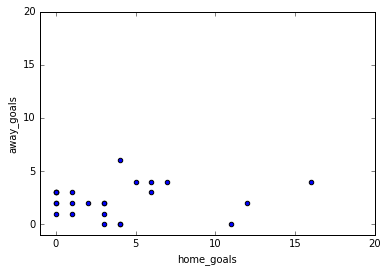

In [159]:
home = pd.DataFrame(data.groupby('home')['home_goals'].sum())
away = pd.DataFrame(data.groupby('away')['away_goals'].sum())
goals = pd.merge(home, away, left_index='home', right_index='away')
# goals.plot(x=goals['home_goals'].values, y=goals['away_goals'].values, kind='scatter')
goals.plot('home_goals', 'away_goals', kind='scatter')
plt.ylim(-1, 20)
plt.xlim(-1, 20)